In [1]:
%matplotlib inline
import numpy as np
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16.0,16.0)
import pandas as pd


chrom - Name of the chromosome (or contig, scaffold, etc.).

chromStart - The starting position of the feature in the chromosome or scaffold. The first base in a chromosome is numbered 0.

chromEnd - The ending position of the feature in the chromosome or scaffold. The chromEnd base is not included in the display of the feature. For example, the first 100 bases of a chromosome are defined as chromStart=0, chromEnd=100, and span the bases numbered 0-99.

name - Name given to a region (preferably unique). Use '.' if no name is assigned.

score - Indicates how dark the peak will be displayed in the browser (0-1000). If all scores were '0' when the data were submitted to the DCC, the DCC assigned scores 1-1000 based on signal value. Ideally the average signalValue per base spread is between 100-1000.

strand - +/- to denote strand or orientation (whenever applicable). Use '.' if no orientation is assigned.

signalValue - Measurement of overall (usually, average) enrichment for the region.

pValue - Measurement of statistical significance (-log10). Use -1 if no pValue is assigned.

qValue - Measurement of statistical significance using false discovery rate (-log10). Use -1 if no qValue is assigned.

peak - Point-source called for this peak; 0-based offset from chromStart. Use -1 if no point-source called.

In [2]:
narrowpeak_cols = ['chrom', 'chromStart', 'chromEnd', 'name', 'score', 'strand', 'signalValue', 'pValue', 'qValue', 'peak']
broadpeak_cols = narrowpeak_cols[:-1]
questpeak_cols = ['chrom', 'peak', 'signalValue']

columns = {'narrowPeak': narrowpeak_cols, 'broadPeak': broadpeak_cols, 'questPeak': questpeak_cols}

def determine_filetype(df):
    c = len(df.columns)
    if c==10:
        return 'narrowPeak'
    elif c==9:
        return 'broadPeak'
    elif c==3:
        return 'questPeak'
    return 'unknown'

replicate1 = pd.read_table('data/ENCSR000DPM/ENCFF001XLV.bed')
replicate2 = pd.read_table('data/ENCSR000DPM/ENCFF001XLW.bed')
replicate1_type = determine_filetype(replicate1)
assert replicate1_type!='unknown'

replicate2_type = determine_filetype(replicate2)
assert replicate2_type!='unknown'

replicate1.columns = columns[replicate1_type]
replicate2.columns = columns[replicate2_type]



In [3]:
def update_peaks(df):
    df['peak'] = np.where(df['peak'] == -1, (df['chromStart']+df['chromEnd'])/2.0, df['peak'])
    return df
replicate1 = update_peaks(replicate1)
replicate2 = update_peaks(replicate2)

In [4]:
replicate1['label'] = 1
replicate2['label'] = 2

In [41]:
combined_df = replicate1.append(replicate2)

In [42]:
columns_to_retain = ['chrom', 'peak', 'signalValue', 'label']
combined_df = combined_df[columns_to_retain]

In [43]:
combined_df = combined_df.sort(['chrom', 'peak'])

In [44]:
grouped = combined_df.groupby('chrom')

In [48]:
BIN_WIDTH = 40
from collections import defaultdict
bin = defaultdict( list )
df1 = combined_df[combined_df['chrom']=='chr1']
df1['bin'] = df1['peak']//BIN_WIDTH
unique_bins = np.unique(df1['bin'])
for bin in unique_bins:
    df = df1[df1['bin']==bin]
    label = df['label']
    if len(label)>=2:
        print('bin: {} replicate1_peak: {} replicate2_peak: {}'.format(bin, df[df['label']==1]['peak'].values, df[df['label']==2]['peak'].values))

bin: 21414.0 replicate1_peak: [ 856595.] replicate2_peak: [ 856595.]
bin: 23870.0 replicate1_peak: [ 954815.] replicate2_peak: [ 954815.]
bin: 29156.0 replicate1_peak: [ 1166255.] replicate2_peak: [ 1166275.]
bin: 30013.0 replicate1_peak: [ 1200555.] replicate2_peak: [ 1200555.]
bin: 30643.0 replicate1_peak: [ 1225735.] replicate2_peak: [ 1225735.]
bin: 30685.0 replicate1_peak: [ 1227435.] replicate2_peak: [ 1227415.]
bin: 30889.0 replicate1_peak: [ 1235595.] replicate2_peak: [ 1235575.]
bin: 30937.0 replicate1_peak: [ 1237495.] replicate2_peak: [ 1237495.]
bin: 31040.0 replicate1_peak: [ 1241615.] replicate2_peak: [ 1241615.]
bin: 34410.0 replicate1_peak: [ 1376435.] replicate2_peak: [ 1376435.]
bin: 43017.0 replicate1_peak: [ 1720695.] replicate2_peak: [ 1720695.]
bin: 46013.0 replicate1_peak: [ 1840555.] replicate2_peak: [ 1840555.]
bin: 46889.0 replicate1_peak: [ 1875595.] replicate2_peak: [ 1875575.]
bin: 47291.0 replicate1_peak: [ 1891655.] replicate2_peak: [ 1891675.]
bin: 49411

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(array([ 11610.,  13625.,  10451.,   7742.,   7336.,   5606.,   3568.,
          1924.,   1370.,   1161.]),
 array([  3.36000000e+02,   6.23350100e+05,   1.24636420e+06,
          1.86937830e+06,   2.49239240e+06,   3.11540650e+06,
          3.73842060e+06,   4.36143470e+06,   4.98444880e+06,
          5.60746290e+06,   6.23047700e+06]),
 <a list of 10 Patch objects>)

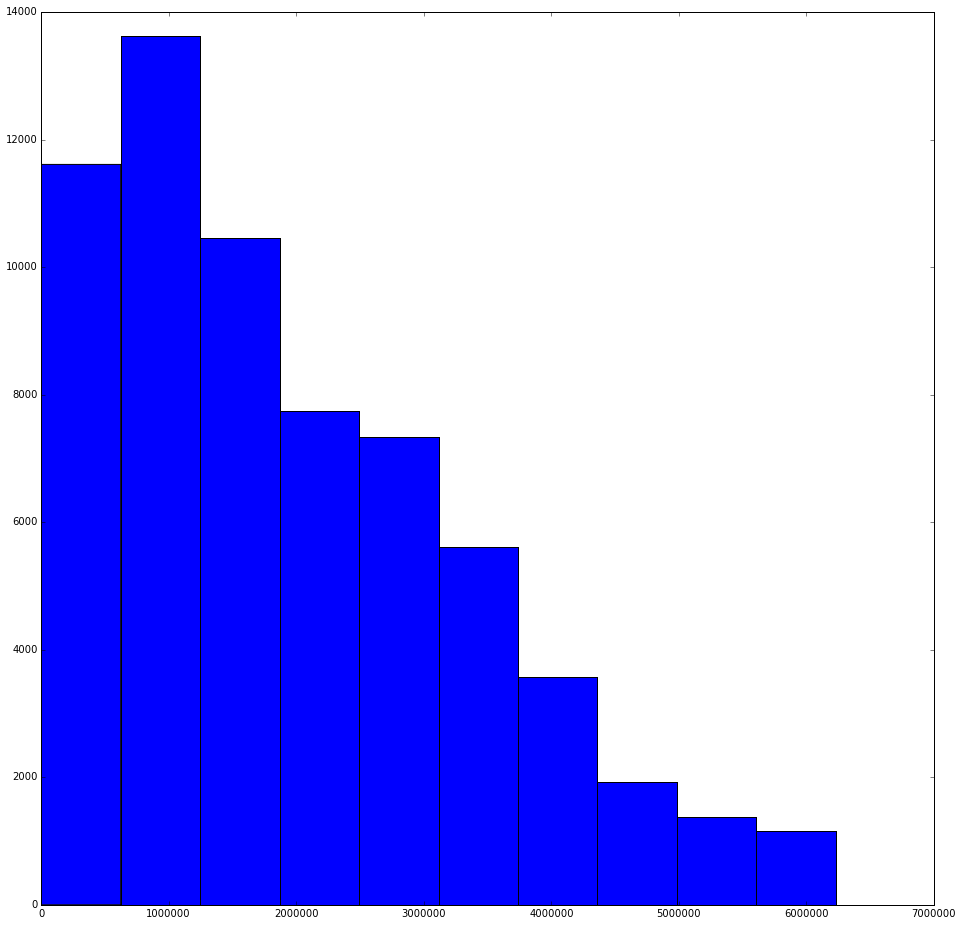

In [16]:
import matplotlib.pyplot as plt
plt.hist(combined_df['bin'])

In [19]:
unique_bins

array([  3.36000000e+02,   3.62000000e+02,   4.70000000e+02, ...,
         6.22919400e+06,   6.23001600e+06,   6.23047700e+06])

In [20]:
len(combined_df['bin'])

64393